# Airlines Data Analysis using SQL and Python

### Objective
The goal of this data analysis project using sql would be identify opportunities to increase the occupancy rate on low performing flights, Which can ultimately lead to increased profitability for the airline.


In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# database connection

In [2]:
# conncet database using sqlite 
connection = sqlite3.connect("travel.sqlite")
cursor = connection.cursor()

In [3]:
# show the all tables from database
cursor.execute("""SELECT name FROM sqlite_master WHERE type ='table'; """) # it create a list of tables
print("List of table present in database")

# store teh table name in table_list
table_list = [table[0] for table in cursor.fetchall()]


List of table present in database


In [4]:
table_list

['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

## Data Exploration /EDA 


In [5]:
# read the aircrafts_data table using pandas sql query and per
aircrafts_data = pd.read_sql_query("SELECT * FROM aircrafts_data",connection)
aircrafts_data.head()

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600


In [6]:
# size in row and column
aircrafts_data.shape

(9, 3)

In [7]:
# airport data
airport_data = pd.read_sql_query("SELECT * from airports_data",connection)
print(airport_data.shape)
airport_data


(104, 5)


,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}","{""en"": ""Murmansk"", ""ru"": ""Мурманск""}","(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}","{""en"": ""Abakan"", ""ru"": ""Абакан""}","(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}","{""en"": ""Barnaul"", ""ru"": ""Барнаул""}","(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...","{""en"": ""Anapa"", ""ru"": ""Анапа""}","(37.3473014831539984,45.002101898192997)",Europe/Moscow


In [8]:
boarding_passes = pd.read_sql_query("SELECT * FROM boarding_passes",connection)
boarding_passes

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


In [9]:
# read the all database table one by one table and  analyze data 

booking = pd.read_sql_query("SELECT * FROM bookings",connection)
seats = pd.read_sql_query("SELECT * FROM seats",connection)
ticket_flights = pd.read_sql_query("SELECT * FROM ticket_flights", connection)


In [31]:
booking

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [32]:
ticket_flights

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100
...,...,...,...,...
1045721,0005435097522,32094,Economy,5200
1045722,0005435097521,32094,Economy,5200
1045723,0005435104384,32094,Economy,5200
1045724,0005435104352,32094,Economy,5200


In [33]:
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [10]:
tickets = pd.read_sql_query("SELECT * FROM tickets",connection)


In [34]:
tickets

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount,date
0,0005432000987,06B046,8149 604011,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
1,0005432000988,06B046,8499 420203,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
2,0005432000989,E170C3,1011 752484,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
3,0005432000990,E170C3,4849 400049,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
4,0005432000991,F313DD,6615 976589,F313DD,2017-07-03 04:37:00+03:00,30900,2017-07-03
...,...,...,...,...,...,...,...
366728,0005435999869,D730BA,0474 690760,D730BA,2017-08-14 11:50:00+03:00,210600,2017-08-14
366729,0005435999870,D730BA,6535 751108,D730BA,2017-08-14 11:50:00+03:00,210600,2017-08-14
366730,0005435999871,A1AD46,1596 156448,A1AD46,2017-08-13 03:49:00+03:00,45900,2017-08-13
366731,0005435999872,7B6A53,9374 822707,7B6A53,2017-08-15 15:54:00+03:00,219400,2017-08-15


In [11]:
# Show the datatype of the all table columns 
for table in table_list:
    print("\ntable",table)
    column_info = connection.execute("PRAGMA table_info({})".format(table))
    for column in column_info.fetchall():
        print(column[1:3])



table aircrafts_data
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')

table airports_data
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')

table boarding_passes
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')

table bookings
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')

table flights
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zone')

table seats
('aircraft_code', 'character(3)')
('seat_no', 'character varying(4)')
('

In [12]:
# missing values

for table in table_list:
    print("\n",table)
    df_table = pd.read_sql_query(f"SELECT * FROM {table}",connection)
    print(df_table.isnull().sum())


 aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

 airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

 boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

 bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

 flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

 seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

 ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

 tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


# BASIC ANALYSIS

##### how many plans have more than 100 seat?


In [13]:
pd.read_sql_query(""" SELECT aircraft_code, count(*) as num_seats from seats 
                  group by aircraft_code having num_seats > 100 """, connection)

,aircraft_code,num_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


#### Insights
- there are 6 aircraft where number of seats in more than 100.
- aircraft 773 has a highest number of seat is 402.

##### How the number of tickets booked and total amount earned changed with the time.


In [14]:
tickets = pd.read_sql_query(""" select * from tickets inner join bookings
                    on tickets.book_ref = bookings.book_ref""",connection)

In [15]:
tickets.dtypes

ticket_no       object
book_ref        object
passenger_id    object
book_ref        object
book_date       object
total_amount     int64
dtype: object

In [16]:
# change book_date dtype into date type 
tickets['book_date'] = pd.to_datetime(tickets['book_date'])
tickets.dtypes

ticket_no                          object
book_ref                           object
passenger_id                       object
book_ref                           object
book_date       datetime64[ns, UTC+03:00]
total_amount                        int64
dtype: object

In [17]:
tickets # show the data format

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount
0,0005432000987,06B046,8149 604011,06B046,2017-07-05 20:19:00+03:00,12400
1,0005432000988,06B046,8499 420203,06B046,2017-07-05 20:19:00+03:00,12400
2,0005432000989,E170C3,1011 752484,E170C3,2017-06-29 01:55:00+03:00,24700
3,0005432000990,E170C3,4849 400049,E170C3,2017-06-29 01:55:00+03:00,24700
4,0005432000991,F313DD,6615 976589,F313DD,2017-07-03 04:37:00+03:00,30900
...,...,...,...,...,...,...
366728,0005435999869,D730BA,0474 690760,D730BA,2017-08-14 11:50:00+03:00,210600
366729,0005435999870,D730BA,6535 751108,D730BA,2017-08-14 11:50:00+03:00,210600
366730,0005435999871,A1AD46,1596 156448,A1AD46,2017-08-13 03:49:00+03:00,45900
366731,0005435999872,7B6A53,9374 822707,7B6A53,2017-08-15 15:54:00+03:00,219400


In [18]:
# we need only date so we create a new date column
tickets["date"] = tickets["book_date"].dt.date
tickets

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount,date
0,0005432000987,06B046,8149 604011,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
1,0005432000988,06B046,8499 420203,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
2,0005432000989,E170C3,1011 752484,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
3,0005432000990,E170C3,4849 400049,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
4,0005432000991,F313DD,6615 976589,F313DD,2017-07-03 04:37:00+03:00,30900,2017-07-03
...,...,...,...,...,...,...,...
366728,0005435999869,D730BA,0474 690760,D730BA,2017-08-14 11:50:00+03:00,210600,2017-08-14
366729,0005435999870,D730BA,6535 751108,D730BA,2017-08-14 11:50:00+03:00,210600,2017-08-14
366730,0005435999871,A1AD46,1596 156448,A1AD46,2017-08-13 03:49:00+03:00,45900,2017-08-13
366731,0005435999872,7B6A53,9374 822707,7B6A53,2017-08-15 15:54:00+03:00,219400,2017-08-15


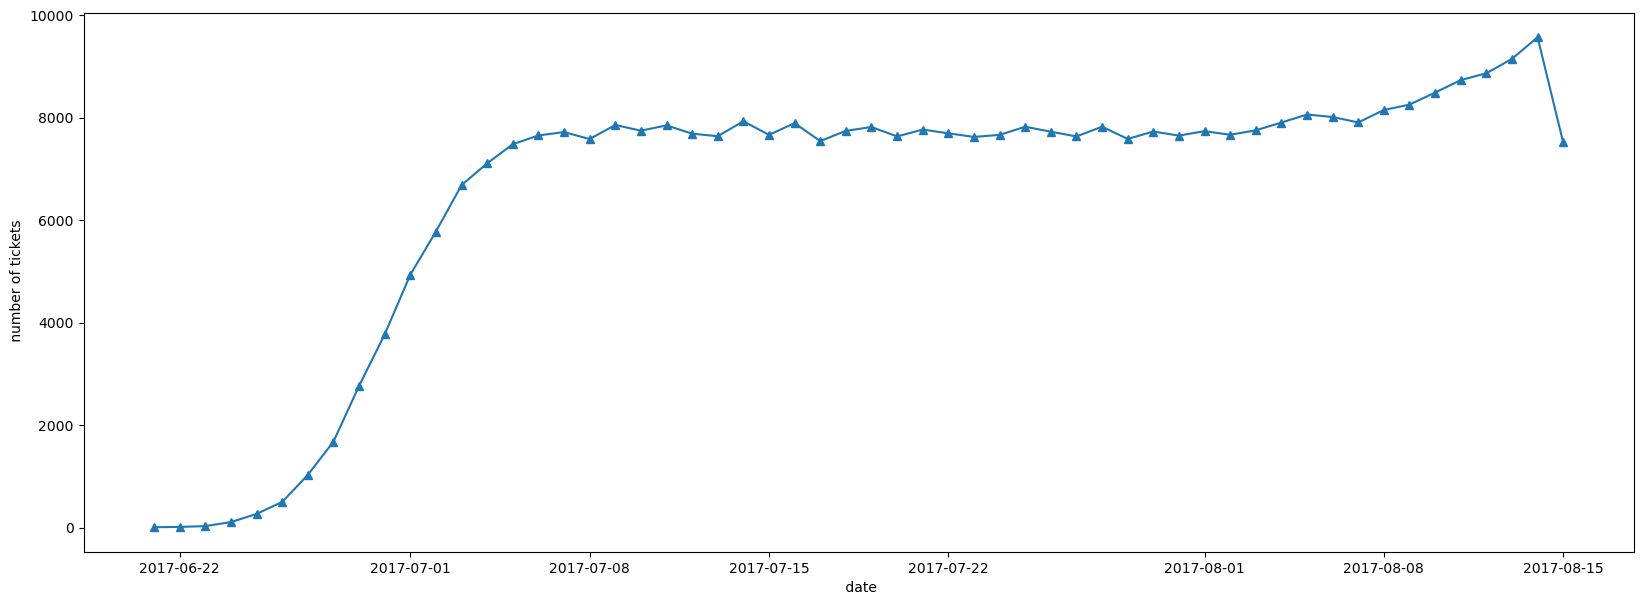

In [19]:
# create a line chart to show the booking trends? 

ticket_count = tickets.groupby('date')[['date']].count()
ticket_count
plt.figure(figsize =(20,7))
plt.plot(ticket_count.index, ticket_count["date"], marker ="^")
plt.xlabel(" date")
plt.ylabel(" number of tickets")
plt.show()

#### Insights
- At 22-06-2017 maybe the start of business, So the graph tickets selling start approx from this date.
- From starting to 08-07-2017 till grow repaidly approx 8000 sell per day.
- Maybe in 08-08-2017 the ticket booking rise again and go to approx 10000 tickets per day.
- but after 14-08-2017 the ticket booking again fall to 8000.

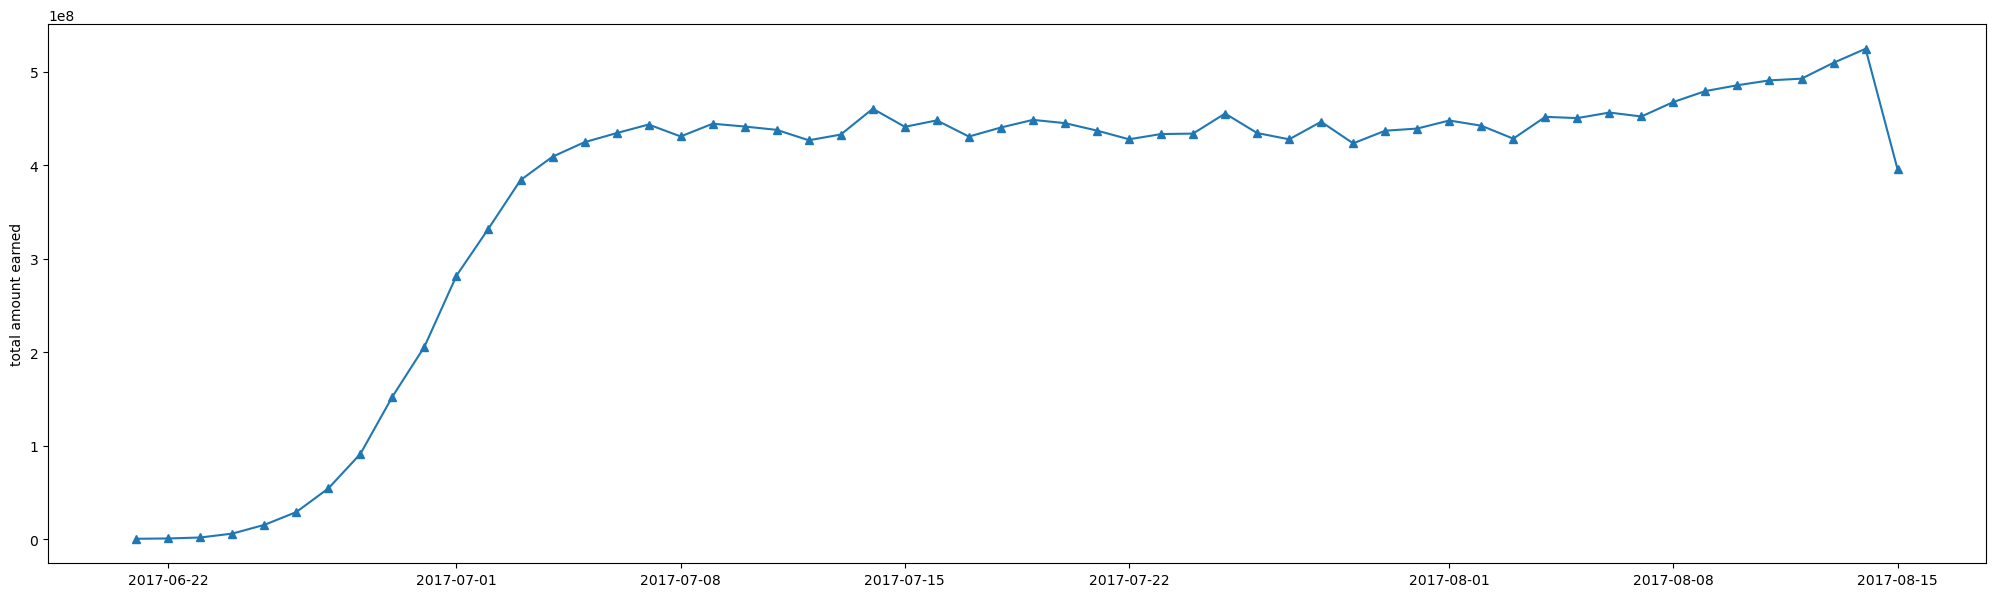

In [20]:
# calculate the daily earning 

bookings = pd.read_sql_query(""" SELECT * FROM bookings""",connection)
bookings['book_date'] = pd.to_datetime(bookings['book_date'])
bookings['date'] = bookings['book_date'].dt.date

x = bookings.groupby('date')[["total_amount"]].sum()
plt.figure(figsize=(25,7))
plt.plot(x.index, x['total_amount'],marker ='^' )
plt.xlabel = (" date")
plt.ylabel("total amount earned")
plt.show()

##### Calculate the average charges for each aircraft with diffrent fare conditions.

In [21]:
df = pd.read_sql_query(""" Select * from ticket_flights
                            join flights on ticket_flights.flight_id = flights.flight_id""",connection)
df

,ticket_no,flight_id,fare_conditions,amount,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,0005432159776,30625,Business,42100,30625,PG0013,2017-07-16 18:15:00+03,2017-07-16 20:00:00+03,AER,SVO,Arrived,773,2017-07-16 18:18:00+03,2017-07-16 20:04:00+03
1,0005435212351,30625,Business,42100,30625,PG0013,2017-07-16 18:15:00+03,2017-07-16 20:00:00+03,AER,SVO,Arrived,773,2017-07-16 18:18:00+03,2017-07-16 20:04:00+03
2,0005435212386,30625,Business,42100,30625,PG0013,2017-07-16 18:15:00+03,2017-07-16 20:00:00+03,AER,SVO,Arrived,773,2017-07-16 18:18:00+03,2017-07-16 20:04:00+03
3,0005435212381,30625,Business,42100,30625,PG0013,2017-07-16 18:15:00+03,2017-07-16 20:00:00+03,AER,SVO,Arrived,773,2017-07-16 18:18:00+03,2017-07-16 20:04:00+03
4,0005432211370,30625,Business,42100,30625,PG0013,2017-07-16 18:15:00+03,2017-07-16 20:00:00+03,AER,SVO,Arrived,773,2017-07-16 18:18:00+03,2017-07-16 20:04:00+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045721,0005435097522,32094,Economy,5200,32094,PG0708,2017-09-14 17:15:00+03,2017-09-14 18:00:00+03,SGC,OVS,Scheduled,733,\N,\N
1045722,0005435097521,32094,Economy,5200,32094,PG0708,2017-09-14 17:15:00+03,2017-09-14 18:00:00+03,SGC,OVS,Scheduled,733,\N,\N
1045723,0005435104384,32094,Economy,5200,32094,PG0708,2017-09-14 17:15:00+03,2017-09-14 18:00:00+03,SGC,OVS,Scheduled,733,\N,\N
1045724,0005435104352,32094,Economy,5200,32094,PG0708,2017-09-14 17:15:00+03,2017-09-14 18:00:00+03,SGC,OVS,Scheduled,733,\N,\N


In [22]:
df = pd.read_sql_query(""" Select fare_conditions, aircraft_code, round(avg(amount),2) as amount from ticket_flights
                            join flights on ticket_flights.flight_id = flights.flight_id
                            group by aircraft_code, fare_conditions""",connection)
df

,fare_conditions,aircraft_code,amount
0,Business,319,113550.56
1,Economy,319,38311.40
2,Business,321,34435.66
3,Economy,321,11534.97
4,Business,733,41865.63
5,Economy,733,13985.15
6,Business,763,82839.84
7,Economy,763,27594.72
8,Business,773,57779.91
9,Comfort,773,32740.55


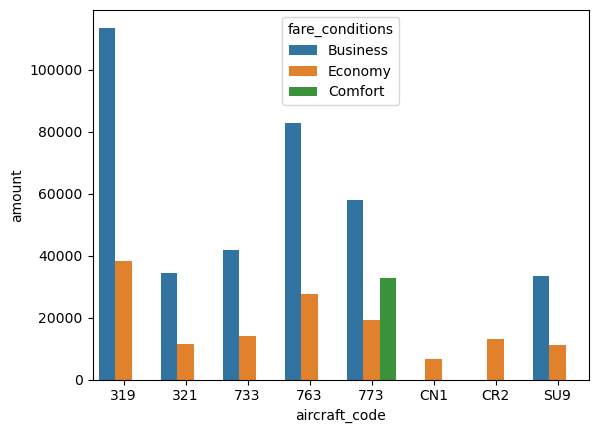

In [23]:
# create a chart of fare using seaborn
import seaborn as sns

sns.barplot(data =df, x='aircraft_code', y ="amount", hue = 'fare_conditions')
plt.show()

#### insights
- In aircraft 319 has largest booking in business and the amount cross 1Lakh.
- In aircraft 773 has only 1 aircraft has comfort fare conditions.
- In aircraft CN1 and CR2 has only Economy class as well as CN1 is lowest sell amount. 
- In Business class is more sell the other classes.

## Analyzing the accupancy rate

##### For each craft calculate the total revenue per year and the average per ticket

In [41]:
# total revenue earn by each craft
pd.read_sql_query(""" SELECT aircraft_code, count(*) as ticket_count ,sum(amount) as total_revenue from ticket_flights
                        join flights on ticket_flights.flight_id = flights.flight_id 
                        group by aircraft_code""", connection)


,aircraft_code,ticket_count,total_revenue
0,319,52853,2706163100
1,321,107129,1638164100
2,733,86102,1426552100
3,763,124774,4371277100
4,773,144376,3431205500
5,CN1,14672,96373800
6,CR2,150122,1982760500
7,SU9,365698,5114484700


In [25]:
# Find the average revenue per ticket
pd.read_sql_query(""" select aircraft_code, ticket_count, total_revenue, total_revenue/ticket_count as avg_revenue_per_ticket from  (SELECT aircraft_code, count(*) as ticket_count ,sum(amount) as total_revenue from ticket_flights
                        join flights on ticket_flights.flight_id = flights.flight_id 
                        group by aircraft_code)""", connection)


,aircraft_code,ticket_count,total_revenue,avg_revenue_per_ticket
0,319,52853,2706163100,51201
1,321,107129,1638164100,15291
2,733,86102,1426552100,16568
3,763,124774,4371277100,35033
4,773,144376,3431205500,23765
5,CN1,14672,96373800,6568
6,CR2,150122,1982760500,13207
7,SU9,365698,5114484700,13985


##### Calculate the average occupancy per aircraft


In [26]:
# count the booked seats of each craft
pd.read_sql_query(""" SELECT aircraft_code, flights.flight_id, count(*) as seat_counts from boarding_passes
                        inner join flights
                        on boarding_passes.flight_id = flights.flight_id
                        group by aircraft_code ,flights.flight_id """, connection)

,aircraft_code,flight_id,seat_counts
0,319,1162,51
1,319,1166,54
2,319,1167,57
3,319,1168,60
4,319,1170,58
...,...,...,...
11513,SU9,32925,12
11514,SU9,32928,25
11515,SU9,32931,12
11516,SU9,32933,16


In [27]:
# also need total seats in aircraft
pd.read_sql_query(""" select aircraft_code, count(*) as num_of_seats from seats 
                    group by aircraft_code""", connection)

,aircraft_code,num_of_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402
6,CN1,12
7,CR2,50
8,SU9,97


In [28]:
# now mearge both above table using joins  and add occupancy rate
occupancy_rate = pd.read_sql_query(""" Select table_A.aircraft_code, avg(table_A.seat_counts)as booked_seats, table_B.num_of_seats, avg(table_A.seat_counts)/table_B.num_of_seats as occupancy_rate
                        FROM
                        ( SELECT aircraft_code, flights.flight_id, count(*) as seat_counts from boarding_passes
                        inner join flights
                        on boarding_passes.flight_id = flights.flight_id
                        group by aircraft_code ,flights.flight_id 
                        ) as table_A
                        
                        inner join 
                        
                        ( select aircraft_code, count(*) as num_of_seats from seats 
                        group by aircraft_code 
                        ) as table_b
                        on table_A.aircraft_code =  table_B.aircraft_code group by table_A.aircraft_code""", connection)


occupancy_rate

,aircraft_code,booked_seats,num_of_seats,occupancy_rate
0,319,53.583181,116,0.461924
1,321,88.809231,170,0.522407
2,733,80.255462,130,0.617350
3,763,113.937294,222,0.513231
4,773,264.925806,402,0.659019
5,CN1,6.004431,12,0.500369
6,CR2,21.482847,50,0.429657
7,SU9,56.812113,97,0.585692


##### Caculate by how much the total annual turnover could increase by giving all aircraft a 10% higher occupancy rate. 


In [29]:
occupancy_rate['increage_10%_occ_rate'] = occupancy_rate['occupancy_rate'] + occupancy_rate['occupancy_rate']*0.1
occupancy_rate

,aircraft_code,booked_seats,num_of_seats,occupancy_rate,increage_10%_occ_rate
0,319,53.583181,116,0.461924,0.508116
1,321,88.809231,170,0.522407,0.574648
2,733,80.255462,130,0.617350,0.679085
3,763,113.937294,222,0.513231,0.564554
4,773,264.925806,402,0.659019,0.724921
5,CN1,6.004431,12,0.500369,0.550406
6,CR2,21.482847,50,0.429657,0.472623
7,SU9,56.812113,97,0.585692,0.644261


In [36]:
# calculate the total revenue before after occupancy rate increage

total_revenue = pd.read_sql_query(""" select aircraft_code ,sum(amount) as total_revenue  from ticket_flights
                                        join flights
                                        on ticket_flights.flight_id = flights.flight_id
                                        group by aircraft_code """, connection)
total_revenue

,aircraft_code,total_revenue
0,319,2706163100
1,321,1638164100
2,733,1426552100
3,763,4371277100
4,773,3431205500
5,CN1,96373800
6,CR2,1982760500
7,SU9,5114484700


In [ ]:
pd.set_option("display.float_format",str)

In [40]:
# add column in accupancy_Rate increase turnover when increate the rate
occupancy_rate["increase_Total_annual_rate"] = (total_revenue['total_revenue']/occupancy_rate["occupancy_rate"])*occupancy_rate["increage_10%_occ_rate"]

occupancy_rate


,aircraft_code,booked_seats,num_of_seats,occupancy_rate,increage_10%_occ_rate,increase_Total_annual_rate
0,319,53.583181,116,0.461924,0.508116,2.976779e+09
1,321,88.809231,170,0.522407,0.574648,1.801981e+09
2,733,80.255462,130,0.617350,0.679085,1.569207e+09
3,763,113.937294,222,0.513231,0.564554,4.808405e+09
4,773,264.925806,402,0.659019,0.724921,3.774326e+09
5,CN1,6.004431,12,0.500369,0.550406,1.060112e+08
6,CR2,21.482847,50,0.429657,0.472623,2.181037e+09
7,SU9,56.812113,97,0.585692,0.644261,5.625933e+09


jumping jacj
mountain claim
squqt side kick
squat jump 30
push up
plank push up
side leg raise left
side leg raise right
T Rotation
hip bridge

### interview analyst
dax,
role and resposability
primary skill set 
rate your skills in 10 
tell 5 sql function to use for data cleaning
mid function -->or substring function  --- WHAT parameter need 
diff PK and FK (contraints)
normalization 
senerio base question --> use if or ifs or use case statement
where vs having
how to use agg with where
indexs

create user define function
-ve sign remove ---abs

what is use of  view 
car index function use --- find posiotin on string 
use of merge query and data query
dax -- 

alter cmd in sql --- column 
how to update name of 1 student in table 
use like operator '%s'
TCL commands use --vommit, rollback, recovery, savepoint,
DDL ,DML
truncate, delete ,drop
why use groupby
what is constrainst and why use  --. 6types -->  pK,FK,notnull,unique
join -type why use -->fetch data from multiple columns 4type 
how you 
where you see in you after 5years
resume question 
and communication part check
project related question
ETL process 
SQL window function (rank ,denserank, )
in EXCEL report and dashboard
slicer use in pivot as to connect and make intractive
diffrence in ms-excel and tablue or power bi
tableau in dimention measure.

data modeling nrmalizatin and denormalization 
power bi
import mode concetivity
direct query connectivity
merge functionality
modeling
dax fuction use
related function
modeling schema (star, snowfall)
dimention table and fact table

### EXCEL 
    flash fill
    text to columns
    vlookup --+ limitation  only search left to right 
    xlookup -- left to right search + right to left also (not in 2016 version)
    match -- retun index number 
    index  -- take index number and find another colum value using index number
    when data in row format use  --- hlookup
    lookup -- use to check value  in range array 